# 데이터 읽기

In [199]:
import pandas as pd
import numpy as np

# 데이터 불러오기
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

# 데이터 시각화 및 확인

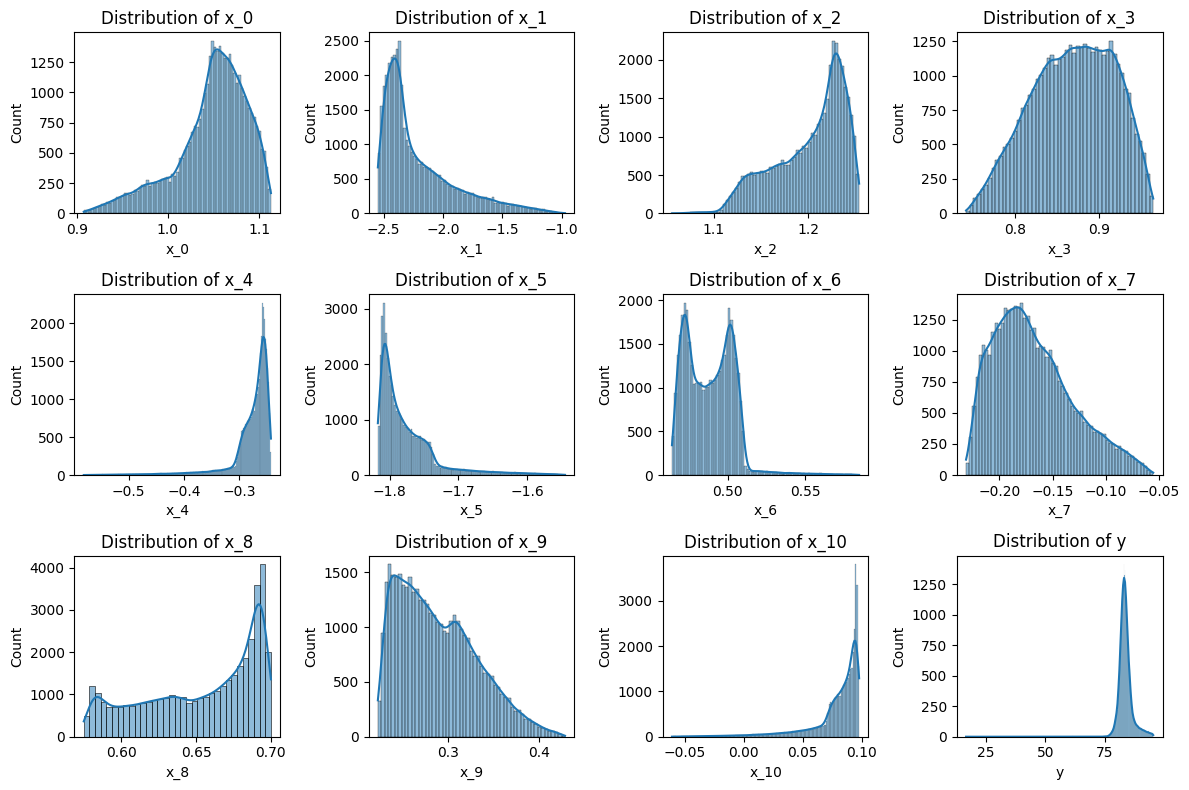

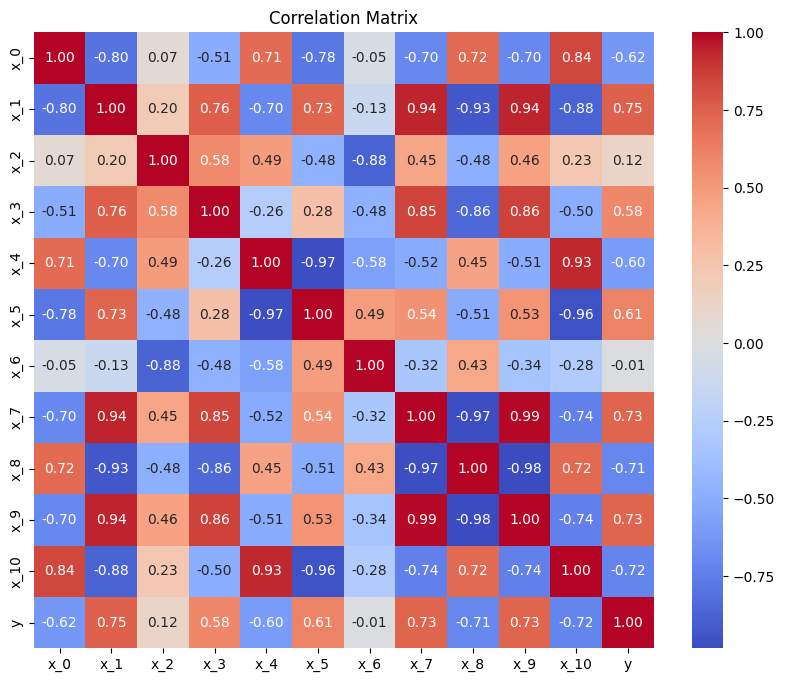

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_df=train_df.drop(columns=['ID'])

# 4. 변수 간 상관관계 분석
correlation_matrix = train_df.corr()

# 5. 주요 변수의 분포 시각화
plt.figure(figsize=(12, 8))
for i, column in enumerate(train_df.columns[0:], 1):
    plt.subplot(3, 4, i)
    sns.histplot(train_df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# y와 각 변수 간의 상관관계 히트맵
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()


In [15]:
###############다중 진공성 처리#################  10 9 8 4 7 5
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

# 다중공선성 확인을 위한 VIF 계산
X = train_df.drop(columns=['y'])
X_with_const = add_constant(X)  # 절편 추가

vif = pd.DataFrame()
vif["Variable"] = X_with_const.columns
vif["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

vif = vif[vif['Variable'] != 'const']  # const 열 제외
print(vif)


   Variable         VIF
1       x_0    4.168681
2       x_1   28.533609
3       x_2   20.029555
4       x_3    4.595577
5       x_4   61.831832
6       x_5  107.828757
7       x_6   18.764678
8       x_7   70.620162
9       x_8  139.751844
10      x_9  141.274160
11     x_10  235.032237


In [19]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# 초기 VIF 계산
X_reduced = X.copy()  # 원본 데이터 유지
vif_history = []

while True:
    # VIF 계산
    X_with_const = add_constant(X_reduced)
    vif = pd.DataFrame()
    vif["Variable"] = X_with_const.columns
    vif["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]
    vif = vif[vif['Variable'] != 'const']  # const 열 제외

    # VIF 값을 저장
    vif_history.append(vif.sort_values(by="VIF", ascending=False))

    # VIF 값이 10을 초과하는 변수 중 가장 큰 것을 제거
    max_vif_variable = vif.loc[vif['VIF'].idxmax(), 'Variable']
    if vif['VIF'].max() > 10:
        print(f"Removing variable '{max_vif_variable}' with VIF: {vif['VIF'].max()}")
        X_reduced = X_reduced.drop(columns=[max_vif_variable])
    else:
        break

# 최종 VIF 결과 출력
print("Final VIF after variable removals:")
print(vif.sort_values(by="VIF", ascending=False))

# 각 단계별 VIF 결과 확인
for i, vif_df in enumerate(vif_history):
    print(f"\nStep {i + 1} VIF:")
    print(vif_df.sort_values(by="VIF", ascending=False))


Removing variable 'x_10' with VIF: 235.0322366304851
Removing variable 'x_9' with VIF: 132.1633648880479
Removing variable 'x_8' with VIF: 85.4979562659759
Removing variable 'x_4' with VIF: 41.71194959683867
Removing variable 'x_7' with VIF: 25.65933094026069
Removing variable 'x_5' with VIF: 22.768923893803827
Final VIF after variable removals:
  Variable       VIF
3      x_2  6.161301
2      x_1  5.430334
5      x_6  4.713050
4      x_3  4.145824
1      x_0  3.487735

Step 1 VIF:
   Variable         VIF
11     x_10  235.032237
10      x_9  141.274160
9       x_8  139.751844
6       x_5  107.828757
8       x_7   70.620162
5       x_4   61.831832
2       x_1   28.533609
3       x_2   20.029555
7       x_6   18.764678
4       x_3    4.595577
1       x_0    4.168681

Step 2 VIF:
   Variable         VIF
10      x_9  132.163365
9       x_8  124.885447
8       x_7   69.085969
6       x_5   52.029470
5       x_4   48.639770
2       x_1   28.381591
3       x_2   19.168689
7       x_6   18.760

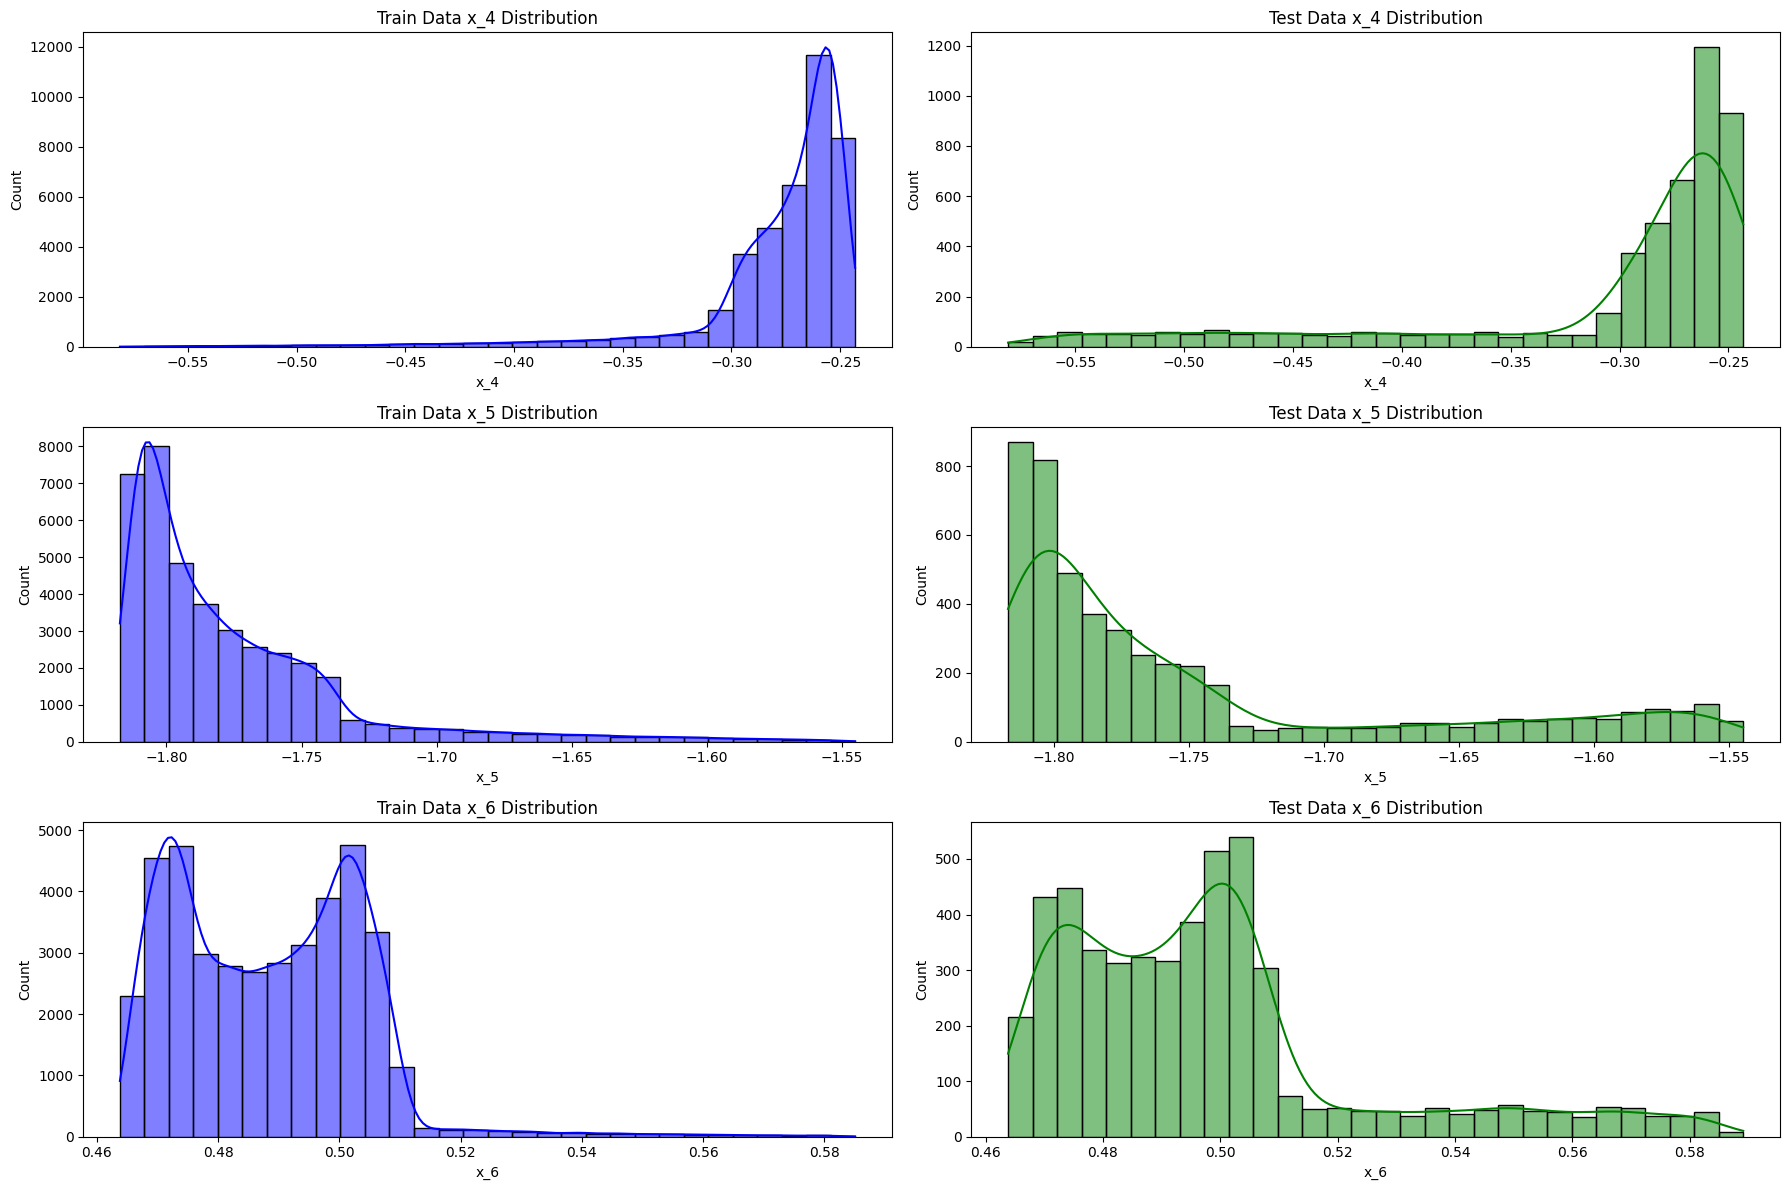

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시각화를 위한 플롯 설정
plt.figure(figsize=(18, 12))

# x_4 컬럼 분포 시각화
plt.subplot(3, 2, 1)
sns.histplot(train_df['x_4'], kde=True, color='blue', bins=30)
plt.title('Train Data x_4 Distribution')

plt.subplot(3, 2, 2)
sns.histplot(test_df['x_4'], kde=True, color='green', bins=30)
plt.title('Test Data x_4 Distribution')

# x_5 컬럼 분포 시각화
plt.subplot(3, 2, 3)
sns.histplot(train_df['x_5'], kde=True, color='blue', bins=30)
plt.title('Train Data x_5 Distribution')

plt.subplot(3, 2, 4)
sns.histplot(test_df['x_5'], kde=True, color='green', bins=30)
plt.title('Test Data x_5 Distribution')

# x_6 컬럼 분포 시각화
plt.subplot(3, 2, 5)
sns.histplot(train_df['x_6'], kde=True, color='blue', bins=30)
plt.title('Train Data x_6 Distribution')

plt.subplot(3, 2, 6)
sns.histplot(test_df['x_6'], kde=True, color='green', bins=30)
plt.title('Test Data x_6 Distribution')

plt.tight_layout()
plt.show()


# 데이터전처리

In [200]:
#다중진공성 많이 큰 10 9 8 컬럼 삭제
train_df=train_df.drop(columns=['x_10','x_9','x_8'])
test_df=test_df.drop(columns=['x_10','x_9','x_8'])




import numpy as np

# train_df와 test_df의 x_4, x_5 컬럼에 대해 로그 변환을 위한 음수 처리
# min_x1_train = train_df['x_1'].min()
min_x4_train = train_df['x_4'].min()
min_x5_train = train_df['x_5'].min()

# min_x1_test = test_df['x_1'].min()
min_x4_test = test_df['x_4'].min()
min_x5_test = test_df['x_5'].min()

# 양수로 만들기 위해 최솟값의 절대값에 1을 더해줌
# offset_x1 = abs(min(min_x1_train, min_x1_test)) + 1
offset_x4 = abs(min(min_x4_train, min_x4_test)) + 1
offset_x5 = abs(min(min_x5_train, min_x5_test)) + 1


# offset을 더하여 음수 값 처리
# train_df['x_1_log'] = np.log1p(train_df['x_1'] + offset_x1)
train_df['x_4_log'] = np.log1p(train_df['x_4'] + offset_x4)
train_df['x_5_log'] = np.log1p(train_df['x_5'] + offset_x5)

# test_df['x_1_log'] = np.log1p(test_df['x_1'] + offset_x1)
test_df['x_4_log'] = np.log1p(test_df['x_4'] + offset_x4)
test_df['x_5_log'] = np.log1p(test_df['x_5'] + offset_x5)


#변환한 컬럼 드랍
train_df=train_df.drop(columns=['x_4','x_5','x_6'])
test_df=test_df.drop(columns=['x_4','x_5','x_6'])

# 모델 정의 및 학습

In [201]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, classification_report

# 입력 변수(X)와 타겟 변수(y) 분리
X = train_df.drop(columns=['ID', 'y'])
y = train_df['y']

# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# 학습용 데이터와 검증용 데이터로 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=42)

model.fit(X_train, y_train)

# 검증 데이터로 예측
y_pred = model.predict(X_val)

# 회귀 모델 평가
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 2.7019452477585784
Mean Absolute Error (MAE): 1.2210244604573708
R-squared (R2): 0.6224617118150818


GradientBoosting Model MAE: 1.207245562467503
GradientBoosting Model MSE: 2.5773140847551637
GradientBoosting Model RMSE: 1.6054015338086494
GradientBoosting Model R^2 Score: 0.6398762156707161


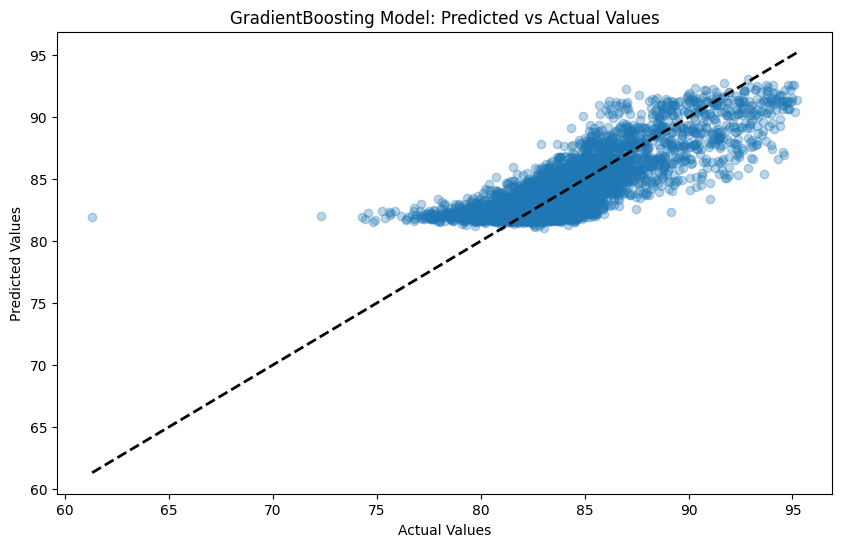

In [165]:
# 모델 리스트
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

models = {
    # 'LinearRegression': LinearRegression(),
    # 'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    # 'SVR': SVR(),
    # 'KNeighbors': KNeighborsRegressor(),
    # 'XGBoost': XGBRegressor(),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    # 'AdaBoost': AdaBoostRegressor(random_state=42),
    # ElasticNet 모델 생성
    # 'Elastic': ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)
}

# 모델 평가
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    # MAE 계산
    mae = mean_absolute_error(y_val, y_pred)
    print(f"{name} Model MAE: {mae}")
    # RMSE 계산
    mse = mean_squared_error(y_val, y_pred)
    print(f"{name} Model MSE: {mse}")
    print(f"{name} Model RMSE: {np.sqrt(mse)}")
    # R^2 계산
    r2 = r2_score(y_val, y_pred)
    print(f"{name} Model R^2 Score: {r2}")
    
    # 실제 값과 예측 값 시각화
    plt.figure(figsize=(10, 6))
    plt.scatter(y_val, y_pred, alpha=0.3)
    plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
    plt.title(f'{name} Model: Predicted vs Actual Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.show()
    

In [196]:
def custom_recall_score(y_true, y_pred, true_percentile=95, pred_percentile=90):
    # 상위 퍼센타일 값 계산
    true_threshold = np.percentile(y_true, true_percentile)
    pred_threshold = np.percentile(y_pred, pred_percentile)
    
    # 상위 퍼센타일 데이터 선택
    true_top = y_true >= true_threshold
    pred_top = y_pred >= pred_threshold
    
    # True Positive 계산
    tp = np.sum(true_top & pred_top)
    # Actual True 상위 데이터 수
    actual_true_top = np.sum(true_top)
    
    # Recall 계산
    recall = tp / actual_true_top if actual_true_top > 0 else 0
    return recall

# 평가 지표 계산
recall = custom_recall_score(y_val, y_pred)

print("Custom Recall:", recall)

Custom Recall: 0.8930348258706468


In [202]:
# 테스트 데이터 예측
test_predictions = model.predict(test_df.drop(columns=['ID']))

test_predictions

array([83.73968436, 82.27361407, 89.51532441, ..., 82.72516197,
       83.01515354, 82.75798299])

In [203]:
# 결과를 제출 형식에 맞게 저장
submission = pd.DataFrame({
    'ID': test_df['ID'],
    'y': test_predictions
})
submission.to_csv('./submission.csv', index=False)